In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug_df = pd.read_csv('data/mouse_drug_data.csv')
clinical_trial_df = pd.read_csv('data/clinicaltrial_data.csv')
#print(mouse_drug_df)
#print(clinical_trial_df) 
pymaceuticals_df = pd.merge( clinical_trial_df,mouse_drug_df, how= "left", on="Mouse ID")
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [53]:
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [54]:
pym_drug=pymaceuticals_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
print(type(pym_drug))
tumor_response_df=pd.DataFrame(pym_drug)
tumor_response_df=tumor_response_df.reset_index()
tumor_response_df#.head()

<class 'pandas.core.series.Series'>


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [55]:
pym_drug=pymaceuticals_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
print(type(pym_drug))
tumor_response_df=pd.DataFrame(pym_drug)
tumor_response_df=tumor_response_df.reset_index()
tumor_response_df.head()

<class 'pandas.core.series.Series'>


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [56]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [57]:
mung_table=pd.pivot_table(pymaceuticals_df,
                          values='Tumor Volume (mm3)',
                          index='Timepoint',
                          columns= 'Drug')
                          
mung_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


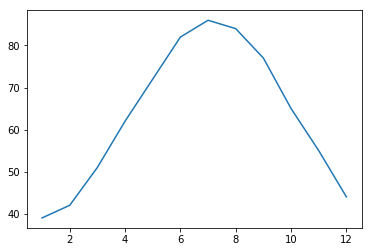

In [58]:
x_axis_data = np.arange(1,13,1)
x_axis_data

points = [39, 42, 51, 62, 72, 82, 86, 84, 77, 65, 55, 44]
plt.plot(x_axis_data, points)
plt.show()

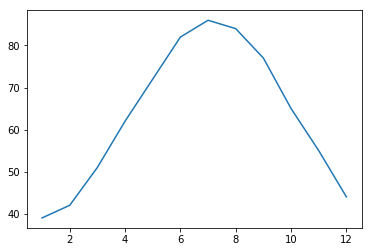

In [59]:
x_axis_data = np.arange(1,13,1)
x_axis_data

points = [39, 42, 51, 62, 72, 82, 86, 84, 77, 65, 55, 44]
plt.plot(x_axis_data, points)
plt.show()

In [60]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [61]:
fil_mung=mung_table.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)
fil_mung

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


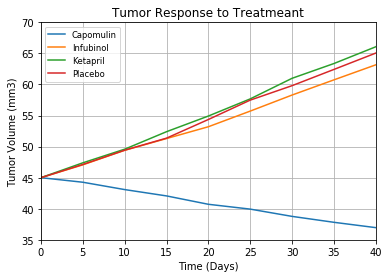

In [62]:
tumor_chart = fil_mung.plot(kind="line", title="Tumor Response to Treatmeant",
                            grid=True,subplots=False,
                            sharex=True)
x=tumor_chart.set_xlabel("Time (Days)")
y=tumor_chart.set_ylabel("Tumor Volume (mm3)")
plt.ylim(35, 70)
plt.xlim(0, 40)
plt.legend(loc="best", fontsize="small", fancybox=True)


#plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
#y = (x + 0.1)**3



#yerror=[]
#xerror=[]
#plt.errorbar(x,y, yerr= yerror, xerr=xerror, fmt='o', ecolors='r')
#tumor_chart.errorbar(y)
#tumor_chart.head()
#matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, 
                            #elinewidth=None, capsize=None, barsabove=False, lolims=False,
                            #uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
                            #*, data=None, **kwargs)[source]

In [63]:
#fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
#ax = axs[0,0]
#ax.errorbar(x, y, yerr=yerr, fmt='o')
#ax.set_title('Vert. symmetric')

In [64]:
#x=(35, 40, 45, 50, 55, 60, 65, 70)
#y=(0, 10, 20, 30, 40)

#plt.title('Tumor Response to Treatmeant')
#plt.xlabel('Time (Days)')
#plt.ylabel('Tumor Volume (mm3)')


In [65]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [66]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [67]:
met_df=pymaceuticals_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
met_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [68]:
met_df=met_df.reset_index()
met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [69]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [70]:
met_error_df=pymaceuticals_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
met_error_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [71]:
met_error_df=met_error_df.reset_index()
met_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [72]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [73]:
mung_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [74]:
mung_table2=pd.pivot_table(pymaceuticals_df,
                          values='Tumor Volume (mm3)',
                          index='Timepoint',
                          columns= 'Drug',
                          aggfunc='sem')
mung_table2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [75]:
fil_mung2=mung_table2.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)
fil_mung2.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


In [76]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


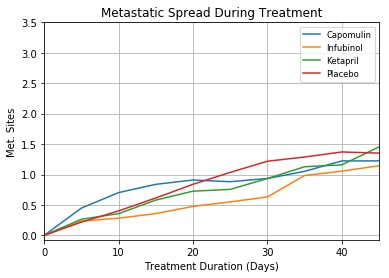

In [77]:
met_chart = fil_mung2.plot(kind="line", title="Metastatic Spread During Treatment",
                           xticks=(0, 10, 20, 30, 40), yticks=(0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5), grid= True
                          )
x=met_chart.set_xlabel("Treatment Duration (Days)")
y=met_chart.set_ylabel("Met. Sites")

#plt.ylim(0.0, 3.5)
#plt.xlim(0,)
plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.xticks(ticks= 0, 10, 20, 30, 40, labels=None, **kwargs)

## Survival Rates

In [78]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [79]:
mice_count=pymaceuticals_df.count()['Mouse ID']
mice_count= "Mice Count"

In [80]:
mice_df=pymaceuticals_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
mice_df.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [81]:
mice_df=mice_df.reset_index()
mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [82]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [83]:
mung_table3=pd.pivot_table(pymaceuticals_df,
                          values='Tumor Volume (mm3)',
                          index='Timepoint',
                          columns= 'Drug',
                          aggfunc='count')
mung_table3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [84]:
fil_mung3=mung_table3.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)
fil_mung3.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [85]:
# Generate the Plot (Accounting for percentages)

# Save the Figure
  
# Show the Figure
plt.show()

Text(0, 0.5, 'Survival Rate(%)')

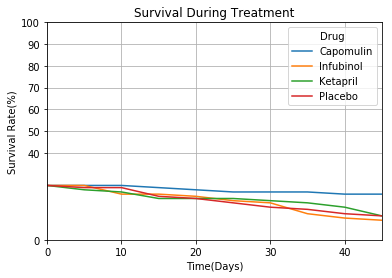

In [86]:
sur_chart =fil_mung3.plot(kind="line",
                           xticks=(0, 10, 20, 30, 40), yticks=(0,40, 50, 60, 70, 80, 90,100), grid=True
                          )
#x=(0, 10, 20, 30, 40,)
#y=(40, 50, 60, 70, 80, 90,100)
#plt.ylim(40,100)
#plt.xlim(0, 40)
plt.title('Survival During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')

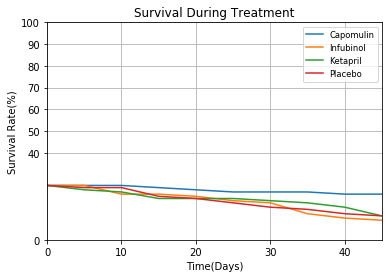

In [87]:
met_chart = fil_mung3.plot(kind="line", title="Survival During Treatment",
                           xticks=(0, 10, 20, 30, 40), yticks=(0,40, 50, 60, 70, 80, 90,100), grid=True
                          )
plt.title('Survival During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')

plt.ylim(0, 100)
plt.xlim(0,)
plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.xticks(ticks= 0, 10, 20, 30, 40, labels=None, **kwargs)

## Summary Bar Graph

In [88]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [89]:
Unique_Drug= pymaceuticals_df.drop_duplicates(subset="Drug")
x = Unique_Drug["Drug"].count()
Unique_Drug
t=('Timepoint').count
Unique_Drug

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol
29,c326,0,45.0,0,Infubinol
57,f234,0,45.0,0,Stelasyn
58,c458,0,45.0,0,Ramicane
108,g989,0,45.0,0,Propriva
115,f394,0,45.0,0,Zoniferol
143,a897,0,45.0,0,Placebo
172,x822,0,45.0,0,Ceftamin


In [90]:
#Unique_Drug= pd.drop_duplicates(subset="Drug")
#x = Unique_Drug["Drug"].count()
#Unique_Drug
#t=('Timepoint').count
Unique_Drug= pymaceuticals_df.groupby('Drug').count()['Timepoint']
Unique_Drug= 'Drug'/t*100
apercent=age_percentage.round(2)

TypeError: unsupported operand type(s) for /: 'str' and 'builtin_function_or_method'

In [91]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

In [92]:
#x=[np.exp()
#y= (-20, 0, 20, 40, 60)
pd.plot(xticks=("Capomulin", "Infubinol", "Ketapril", "Placebo"), yticks=(-20,0,40, 60), kind="bar", facecolor="red", grid= True,)
   
   
plt.title('Tumor Change Over 45 Days Treatment')
plt.xlabel('')
plt.ylabel("%Tumor Volume Change")


AttributeError: module 'pandas' has no attribute 'plot'

In [ ]:
#columns=coulumns_df.mean
#columns.head()
#rows=pd.DataFrame(['Timepoint']).sum()
#rows
#columns_df=pd.pivot(index='Timepoint',columns='Drug', values='Tumor Volume (mm3)')
#coulumns_df=pymaceuticals_df.groupby(['Tumor Volume (mm3)']).count()['Drug']
#coulumns_df.index
#print(pymaceuticals_df.pivot(columns = 'Drug','Timepoint').values()('Tumor Volume (mm3)'))

#columns = [
    #"Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

#  Create a new df for "US" with the columns. 
#pym_mung_drug= reduced_kickstarter_df.loc[reduced_kickstarter_df["country"] == "US",  columns]
#pym_mung_drug.head(
#mung_df=pymaceuticals_df.groupby(['Drug'[],'Timepoint']).sem()['Tumor Volume (mm3)']
#mung_df.head()

#print(pymaceuticals_df.pivot(columns = 'Drug', values = 'Tumor Volume (mm3)')).sum()
#cep_drug_df={'Ceftamin': tumor_response_df.loc[tumor_response_df['Drug']=="Ceftamin"]['Tumor Volume (mm3)']}
#pd.DataFrame(cep_drug_df)
#cap_drug_df={'Capomulin':tumor_response_df.loc[tumor_response_df['Drug']=="Capomulin"]['Tumor Volume (mm3)']}
#pd.DataFrame(cap_drug_df)
#inf_drug_df={'Infubinol':tumor_response_df.loc[tumor_response_df['Drug']=="Infubinol"]['Tumor Volume (mm3)']}
#pd.DataFrame(inf_drug_df)
#ket_drug_df={'Ketapril':tumor_response_df.loc[tumor_response_df['Drug']=="Ketapril"]['Tumor Volume (mm3)']}
#pd.DataFrame(ket_drug_df)
#naf_drug_df={'Naftisol':tumor_response_df.loc[tumor_response_df['Drug']=="Naftisol"]['Tumor Volume (mm3)']}
#pd.DataFrame(naf_drug_df)

In [ ]:
#tumor_error_df=tumer_error_df.reset_index()

#tumor_error_df.head()
#tumor_error_df=tumor_error_df.reset_index()
#tumor_error_df.head()
#tumer_error_df=pymaceuticals_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
#tumor_error_df.head()
#drugs_tpnd=pd.merge( dname,tp, how= "left", on="Tumor Volume (mm3)")
#drugs_tpnd
#tp=pymaceuticals_df.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
#tp.reset_index()
#dname=pymaceuticals_df.groupby(['Drug']).mean()['Tumor Volume (mm3)']
#dname.reset_index()
#drug_name_df=tumor_response_df
#pymaceuticals_df.groupby('Timepoint')['Drug'].unique()
#drug_name=pymaceuticals_df.groupby('Drug').count()

#print(drug_name)

In [ ]:
#result = tumor_response_df.transpose()
#print(result)
#result = pd.transpose()
#print(result)
#pla_drug_df={'Placebo':tumor_response_df.loc[tumor_response_df['Drug']=="Placebo"]['Tumor Volume (mm3)']}
#pd.DataFrame(pla_drug_df)
#mydict={}
##print(tumor_response_df).reset_index()mydict['Capomulin]=(cap_drug_df)
#mydict['Ceftamin']=(cep_drug_df)
#mydict['Infubinol']=(inf_drug_df)
#mydict['Ketapril']=(ket_drug_df)
#mydict['Naftisol']=(naf_drug_df)
#mydict['Placebo']=(pla_drug_df)
#mydict['Propriva']=()
#mydict['Ramicane']=()
#mydict['Stelasyn']=()
#mydict['Zoniferol']=()
#drug_chart=tumor_response_df({"Capomulin":cap_drug_df, "Ceftamin":cep_drug_df,"Infubinol":inf_drug_df})
#drug_chart
#and the result of that would be:
#{'':value1, 'key2':value2, 'key3':value3}